In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')

import ccal

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.max_open_warning'] = 200

HOME_DIR = os.environ['HOME']
CCLE_DIR = os.path.join(HOME_DIR, 'data', 'ccle')

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


# Test make_association_panel

## Test speicfic call

<140617> Target Feature 0 (100 cols) and features (100 cols) have 100 shared columns.
<140617> Dropping features with less than 2 unique values ...
<140617> 	Kept 10 features.
<140617> Scoring ...
<140617> Computing 0.95 CI for using distributions built by 10 bootstraps ...
<140617> 	Bootstrapping 10 features >= 0.000 percentile ...
<140617> 	Bootstrapping 10 features <= 1.000 percentile ...
<140618> Computing P-value & FDR by scoring against 10 permuted targets ...
<140618> 	Scoring against permuted target (0/10) ...
<140618> 	Scoring against permuted target (1/10) ...
<140618> 	Scoring against permuted target (2/10) ...
<140618> 	Scoring against permuted target (3/10) ...
<140618> 	Scoring against permuted target (4/10) ...
<140618> 	Scoring against permuted target (5/10) ...
<140618> 	Scoring against permuted target (6/10) ...
<140618> 	Scoring against permuted target (7/10) ...
<140618> 	Scoring against permuted target (8/10) ...
<140618> 	Scoring against permuted target (9/10) ...

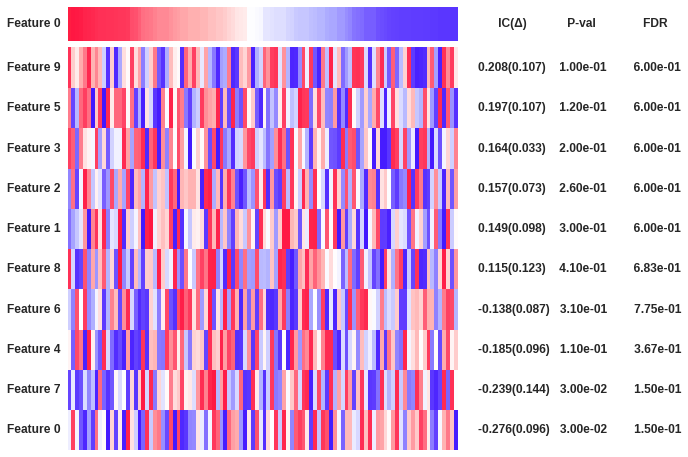

In [2]:
n_samples = 100
n_features = 10

n_targert_categories = None
n_features_categories = None

if n_targert_categories:
    if n_targert_categories == 2:  # Test binary category
        target_type = 'binary'
    elif n_targert_categories > 2:  # Test categorical category
        target_type = 'categorical'
else:  # Test continuous target
    target_type = 'continuous'
    
if n_features_categories:
    if n_features_categories == 2:  # Test binary features
        features_type = 'binary'
    elif n_features_categories > 2:  # Test categorical features
        features_type = 'categorical'
else:  # Test continuous features
    features_type = 'continuous'

simulated_target = ccal.support.simulate_dataframe_or_series(1, n_samples,
                                                             n_categories=n_targert_categories)
simulated_features = ccal.support.simulate_dataframe_or_series(n_features, n_samples,
                                                             n_categories=n_features_categories)
n_samplings = 10
n_permutations = 10
scores = ccal.make_association_panel(simulated_target, simulated_features,
                            target_type=target_type, features_type=features_type,
                            n_features=0,
                            n_samplings=n_samplings, n_permutations=n_permutations,
                            filepath_prefix='result/make_association_panel/test')

## Test with loop

In [ ]:
ccal.support.VERBOSE = False

# Test continuous, categorical, and binary target
for n_targert_categories in [10, 2, None]:
    
    if n_targert_categories:
        if n_targert_categories == 2:  # Test binary category
            target_type = 'binary'
            
        elif n_targert_categories > 2:  # Test categorical category
            target_type = 'categorical'
            
    else:  # Test continuous target
        target_type = 'continuous'
        
    # Test continuous, categorical, and binary features
    for n_features_categories in [None, 10, 2]:
        
        if n_features_categories:
            if n_features_categories == 2:  # Test binary features
                features_type = 'binary'
                
            elif n_features_categories > 2:  # Test categorical features
                features_type = 'categorical'
                
        else:  # Test continuous features
            features_type = 'continuous'

        # Test with varying number of features
        for n_features in [1, 2, 50]:
            
            # Test with varying number of samples
            for n_samples in [3, 100]:

                # Simualte target
                simulated_target = ccal.support.simulate_dataframe_or_series(1,
                                                                             n_samples,
                                                                             n_categories=n_targert_categories)
                
                # Simulate features
                while True:
                    simulated_features = ccal.support.simulate_dataframe_or_series(n_features,
                                                                                   n_samples,
                                                                                   n_categories=n_features_categories)
                    if isinstance(simulated_features, pd.Series):
                        if len(set(simulated_features)) > 2:
                            break
                    else:
                        simulated_features = simulated_features.ix[simulated_features.apply(lambda f: len(set(f)), axis=1) >= 2]
                        if not simulated_features.empty:
                            break
                        
                # Test varying number of parallel jobs
                for n_jobs in [1]:
                    
                    # Test varying numbner of samplings
                    for n_samplings in [1, 3]: 

                        # Test varying number of permutations
                        for n_permutations in [1, 3]:

                            title = '{}X{} & {}X{} @ {}jobs & {}smpl & {}perms'.format(n_features,
                                                                                       n_samples,
                                                                                       target_type[:3],
                                                                                       features_type[:3],
                                                                                       n_jobs,
                                                                                       n_samplings,
                                                                                       n_permutations)
                            print(title)

                            # Test
                            ccal.make_association_panel(simulated_target, simulated_features,
                                                        target_type=target_type, features_type=features_type, 
                                                        n_samplings=n_samplings, n_permutations=n_permutations,
                                                        title=title,                                                   
                                                        filepath_prefix='result/make_association_panel/{}'.format(title))

# Set up real test data

In [3]:
h_matrix = ccal.read_gct('data/nmf_k9_h.gct')
component = 9
target = h_matrix.ix[component, :]
target_type = 'continuous'

variant_filepath = os.path.join(CCLE_DIR, 'ccle_variant.gct')
gene_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_gene_dependency.gct')
gene_expression_filepath = os.path.join(CCLE_DIR, 'ccle_gene_expression.gct')
pathway_expression_filepath = os.path.join(CCLE_DIR, 'ccle_pathway_expression.gct')
regulator_filepath = os.path.join(CCLE_DIR, 'ccle_regulator.gct')
protein_expression_filepath = os.path.join(CCLE_DIR, 'ccle_protein_expression.gct')
phenotype_filepath = os.path.join(CCLE_DIR, 'ccle_phenotype.gct')
drug_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_drug_sensitivity.gct')

variant_df = ccal.read_gct(variant_filepath)
gene_dependency_df = ccal.read_gct(gene_dependency_filepath)
gene_expression_df = ccal.read_gct(gene_expression_filepath)
pathway_expression_df = ccal.read_gct(pathway_expression_filepath)
regulator_df = ccal.read_gct(regulator_filepath)
protein_expression_df = ccal.read_gct(protein_expression_filepath)
phenotype_df = ccal.read_gct(phenotype_filepath)
drug_dependency_df = ccal.read_gct(drug_dependency_filepath)

features_bundles = {}

n_features = 20
index = list(range(n_features))

features_bundle_full = [['Variant', variant_df, 'binary', False, 0, index, []],
                        ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, index, []],
                        ['Gene Expression', gene_expression_df, 'continuous', False, 0, index, []],
                        ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, index, []],
                        ['Regulator', regulator_df, 'continuous', False, 0, index, []],
                        ['Protein Expression', protein_expression_df, 'continuous', False, 0, index, []],
                        ['Phenotype', phenotype_df, 'binary', False, 0, index, []],
                        ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, index, []]]

features_bundle_limited = [['Variant', variant_df, 'binary', False, 0, ['KRAS_MUT', 'TP53_MUT'], []],
                           ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, ['KRAS'], []],
                           ['Gene Expression', gene_expression_df, 'continuous', False, 0, ['KRAS'], []],
                           ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, ['HALLMARK_PROTEIN_SECRETION', 'HALLMARK_APOPTOSIS'], []],
                           ['Regulator', regulator_df, 'continuous', False, 0, ['IPA_AR'], []],
                           ['Protein Expression', protein_expression_df, 'continuous', False, 0, [], []],
                           ['Phenotype', phenotype_df, 'binary', False, 0, ['lung'], []],
                           ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, ['erastin'], []]]

# Test make_association_panels

## Test full annotation

<141338> Loading features bundle ...
<141338> Reading Variant ...
<141338> 	Data: <class 'pandas.core.frame.DataFrame'>.
<141338> 	Data type: binary.
<141338> 	Is ascending: False.
<141338> 	Index axis: 0.
<141338> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<141338> 	Alias: [].
<141338> 	Read 20 features & 1030 samples.
<141338> Reading Gene Dependency ...
<141338> 	Data: <class 'pandas.core.frame.DataFrame'>.
<141338> 	Data type: continuous.
<141338> 	Is ascending: True.
<141338> 	Index axis: 0.
<141338> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<141338> 	Alias: [].
<141338> 	Read 20 features & 503 samples.
<141338> Reading Gene Expression ...
<141338> 	Data: <class 'pandas.core.frame.DataFrame'>.
<141338> 	Data type: continuous.
<141338> 	Is ascending: False.
<141338> 	Index axis: 0.
<141338> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<141338> 	Alias: [].
<141338> 	Read 20 

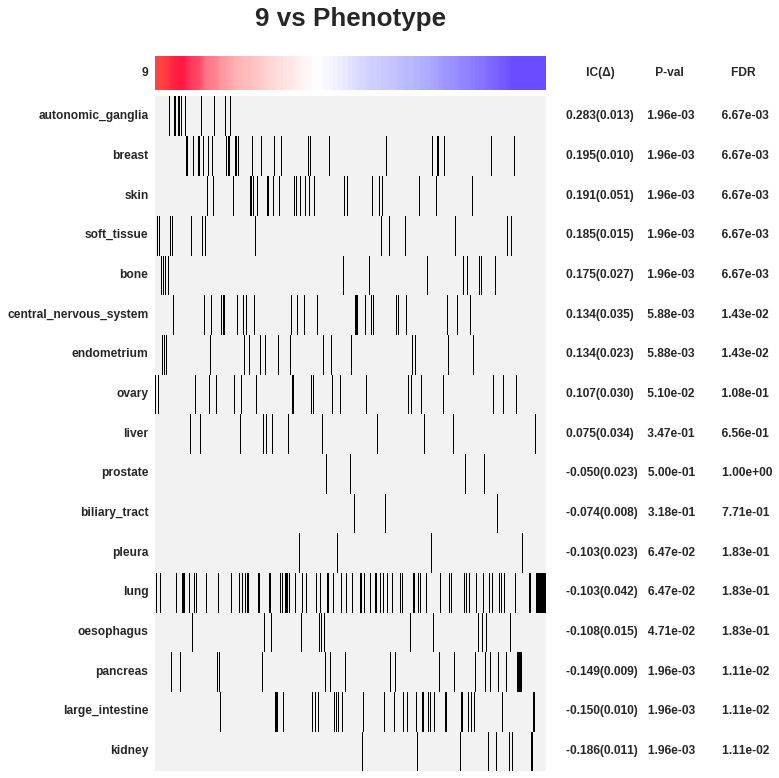

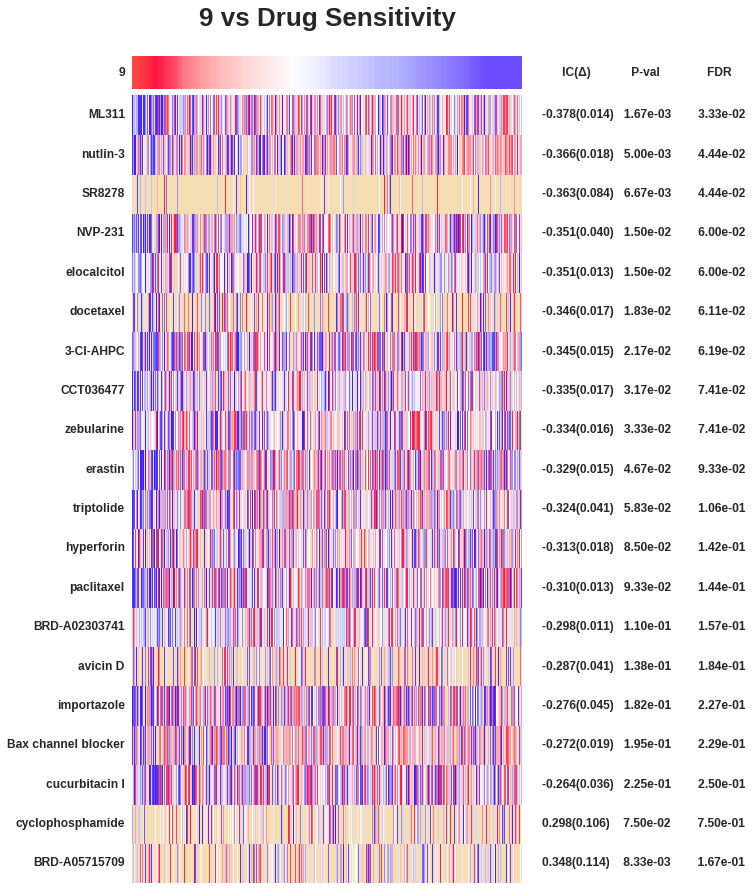

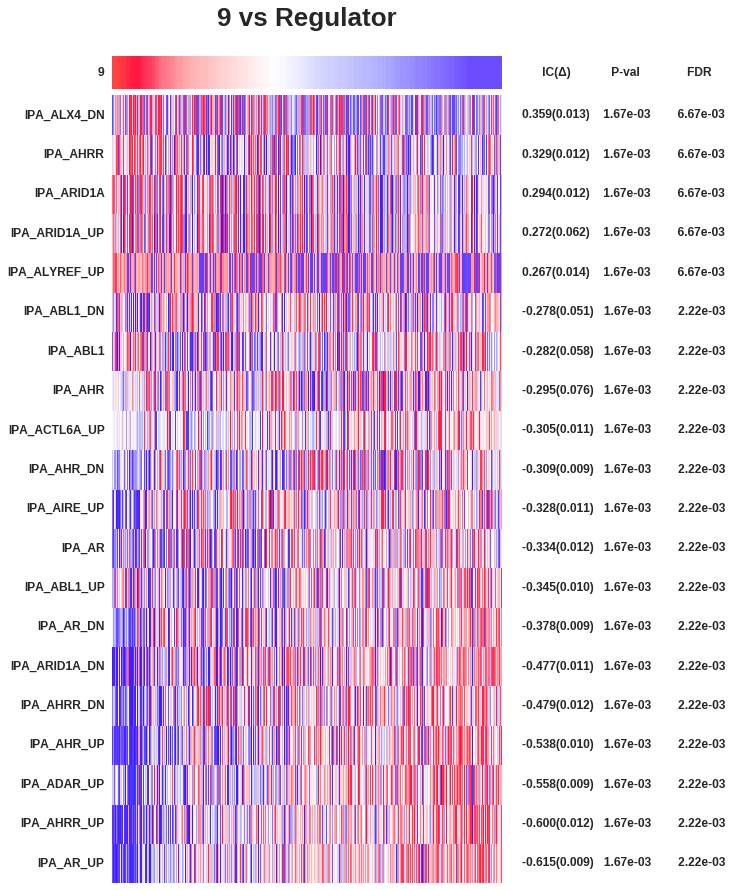

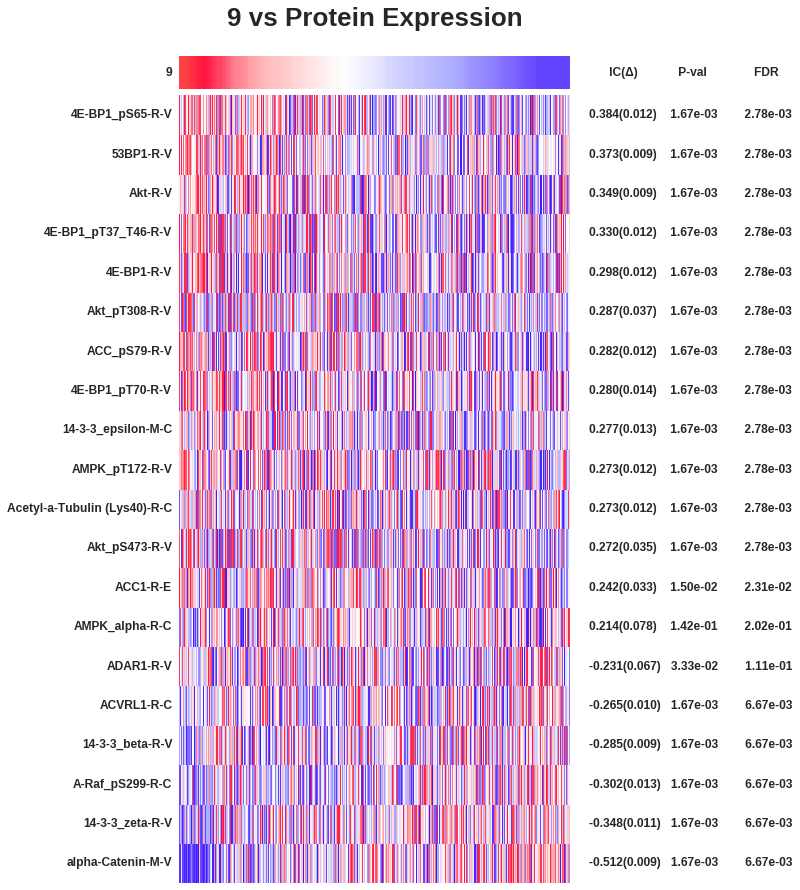

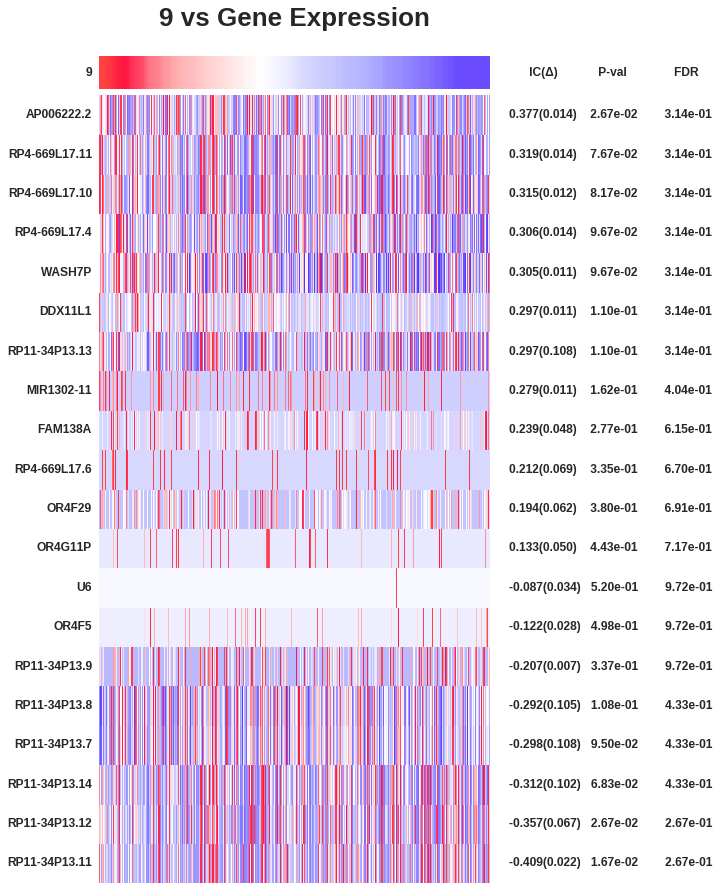

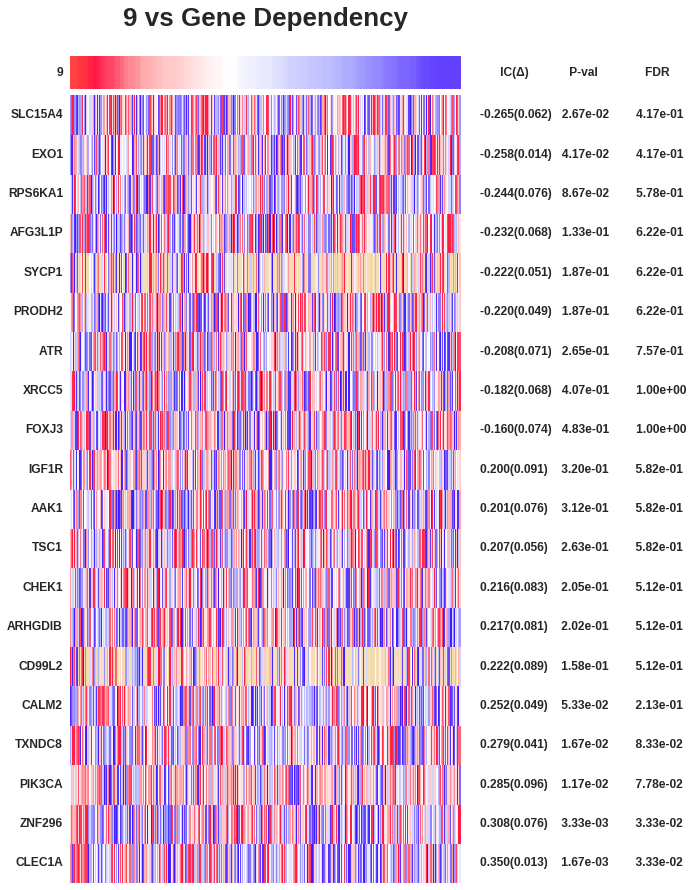

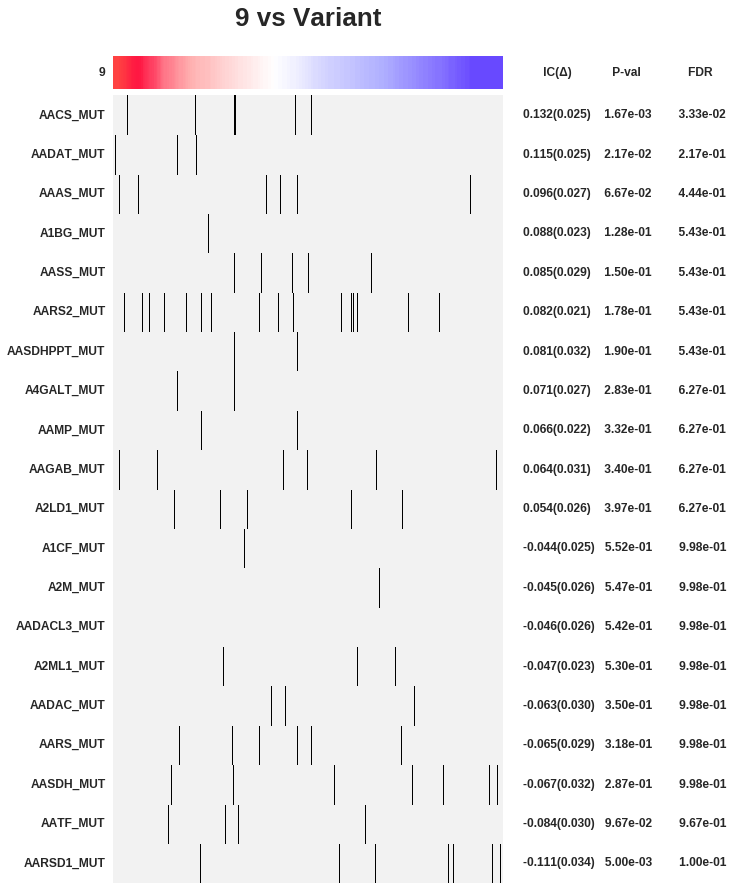

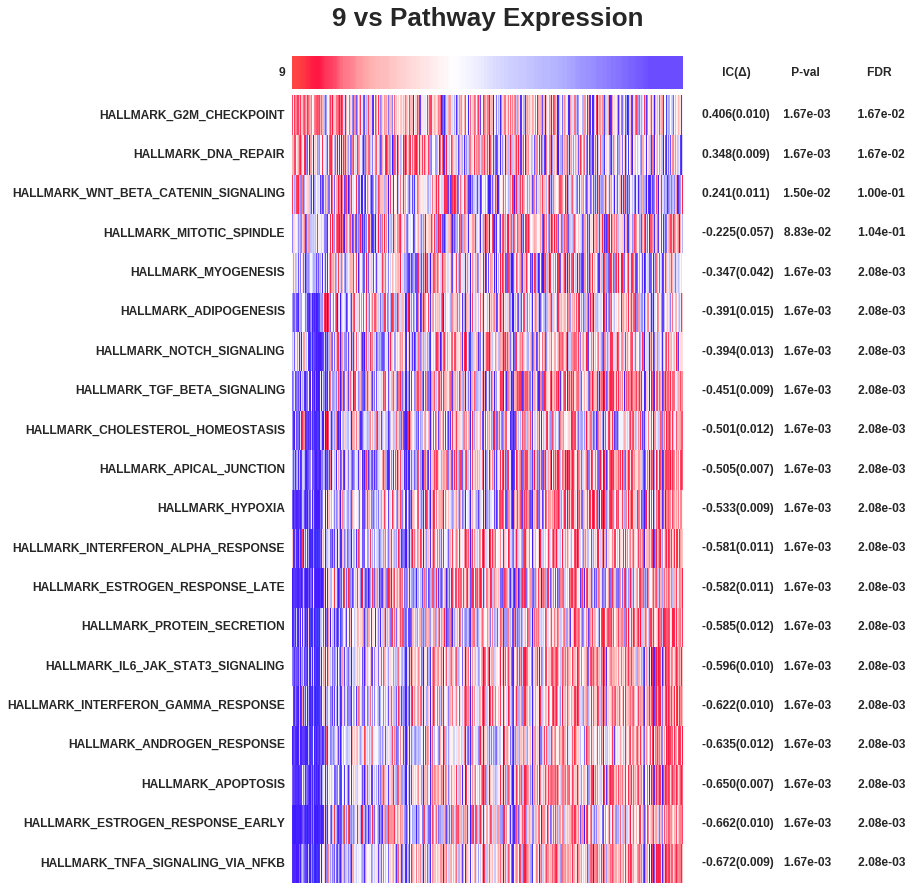

In [13]:
ccal.make_association_panels(target, features_bundle_full,
                             target_type=target_type, n_features=0,
                             directory_path='result/make_association_panels')

## Test limited annotation

In [ ]:
ccal.make_association_panels(target, features_bundle_limited,
                             target_name='KRAS Component {}'.format(component), target_type=target_type,
                             n_features=10, n_jobs=1, n_samplings=3, n_permutations=3,
                             filepath_prefix='result/make_association_panels/limited_')

# Test plot_summary_association_panel

In [ ]:
annotation_bundle = [
    ['Pathway Expression', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathway_expression.txt'],
    ['Pathology',  '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathology.txt'],
    ['Phenotype', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_phenotype.txt'],
    ['Drug Sensitivity', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_drug_sensitivity.txt']
]

ccal.plot_summary_association_panel(target, features_bundle_limited, annotation_bundle, filepath='result/plot_summary_association_panel/test.pdf')